In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import kagglehub
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [30]:


# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ibuko\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1


In [31]:
test_data = pd.read_csv(path+'//test_energy_data.csv')
train_data = pd.read_csv(path+'//train_energy_data.csv')



In [49]:
test_data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [32]:
len(test_data)

100

In [33]:
len(train_data)

1000

In [34]:
train_data.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98
999,Commercial,15813,57,11,31.40,Weekend,3423.63


In [39]:
df = pd.concat([train_data, test_data],ignore_index=True)

In [40]:
df.iloc[995:1005]

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98
999,Commercial,15813,57,11,31.40,Weekend,3423.63
1000,Residential,24563,15,4,28.52,Weekday,2865.57
1001,Commercial,27583,56,23,23.07,Weekend,4283.80
1002,Commercial,45313,4,44,33.56,Weekday,5067.83
1003,Residential,41625,84,17,27.39,Weekend,4624.30
1004,Residential,36720,58,47,17.08,Weekday,4820.59


train data index 0-999, test data index 1000-1099

In [41]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 167.0 KB


In [42]:
df['Is weekend'] = df['Day of Week'].apply(lambda x: 1 if x == 'Weekend' else 0)


In [43]:
df.drop(columns='Day of Week', inplace=True)

In [44]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Energy Consumption   1100 non-null   float64
 6   Is weekend           1100 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 115.4 KB


In [45]:
df['Building Type'].nunique()

3

In [46]:
df['Building Type'].value_counts()

Building Type
Residential    387
Commercial     362
Industrial     351
Name: count, dtype: int64

In [47]:
df['Building Type'] = df['Building Type'].map({'Residential':0,'Commercial':1,'Industrial':2})

In [48]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   int64  
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Energy Consumption   1100 non-null   float64
 6   Is weekend           1100 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 60.3 KB


In [51]:
train_data = df.iloc[:1000]

In [52]:
train_data.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Is weekend
995,0,14419,68,44,23.95,3661.21,1
996,2,12194,7,22,14.67,3546.34,1
997,1,39562,88,20,32.18,5147.21,0
998,0,8348,67,37,16.48,3244.98,1
999,1,15813,57,11,31.40,3423.63,1


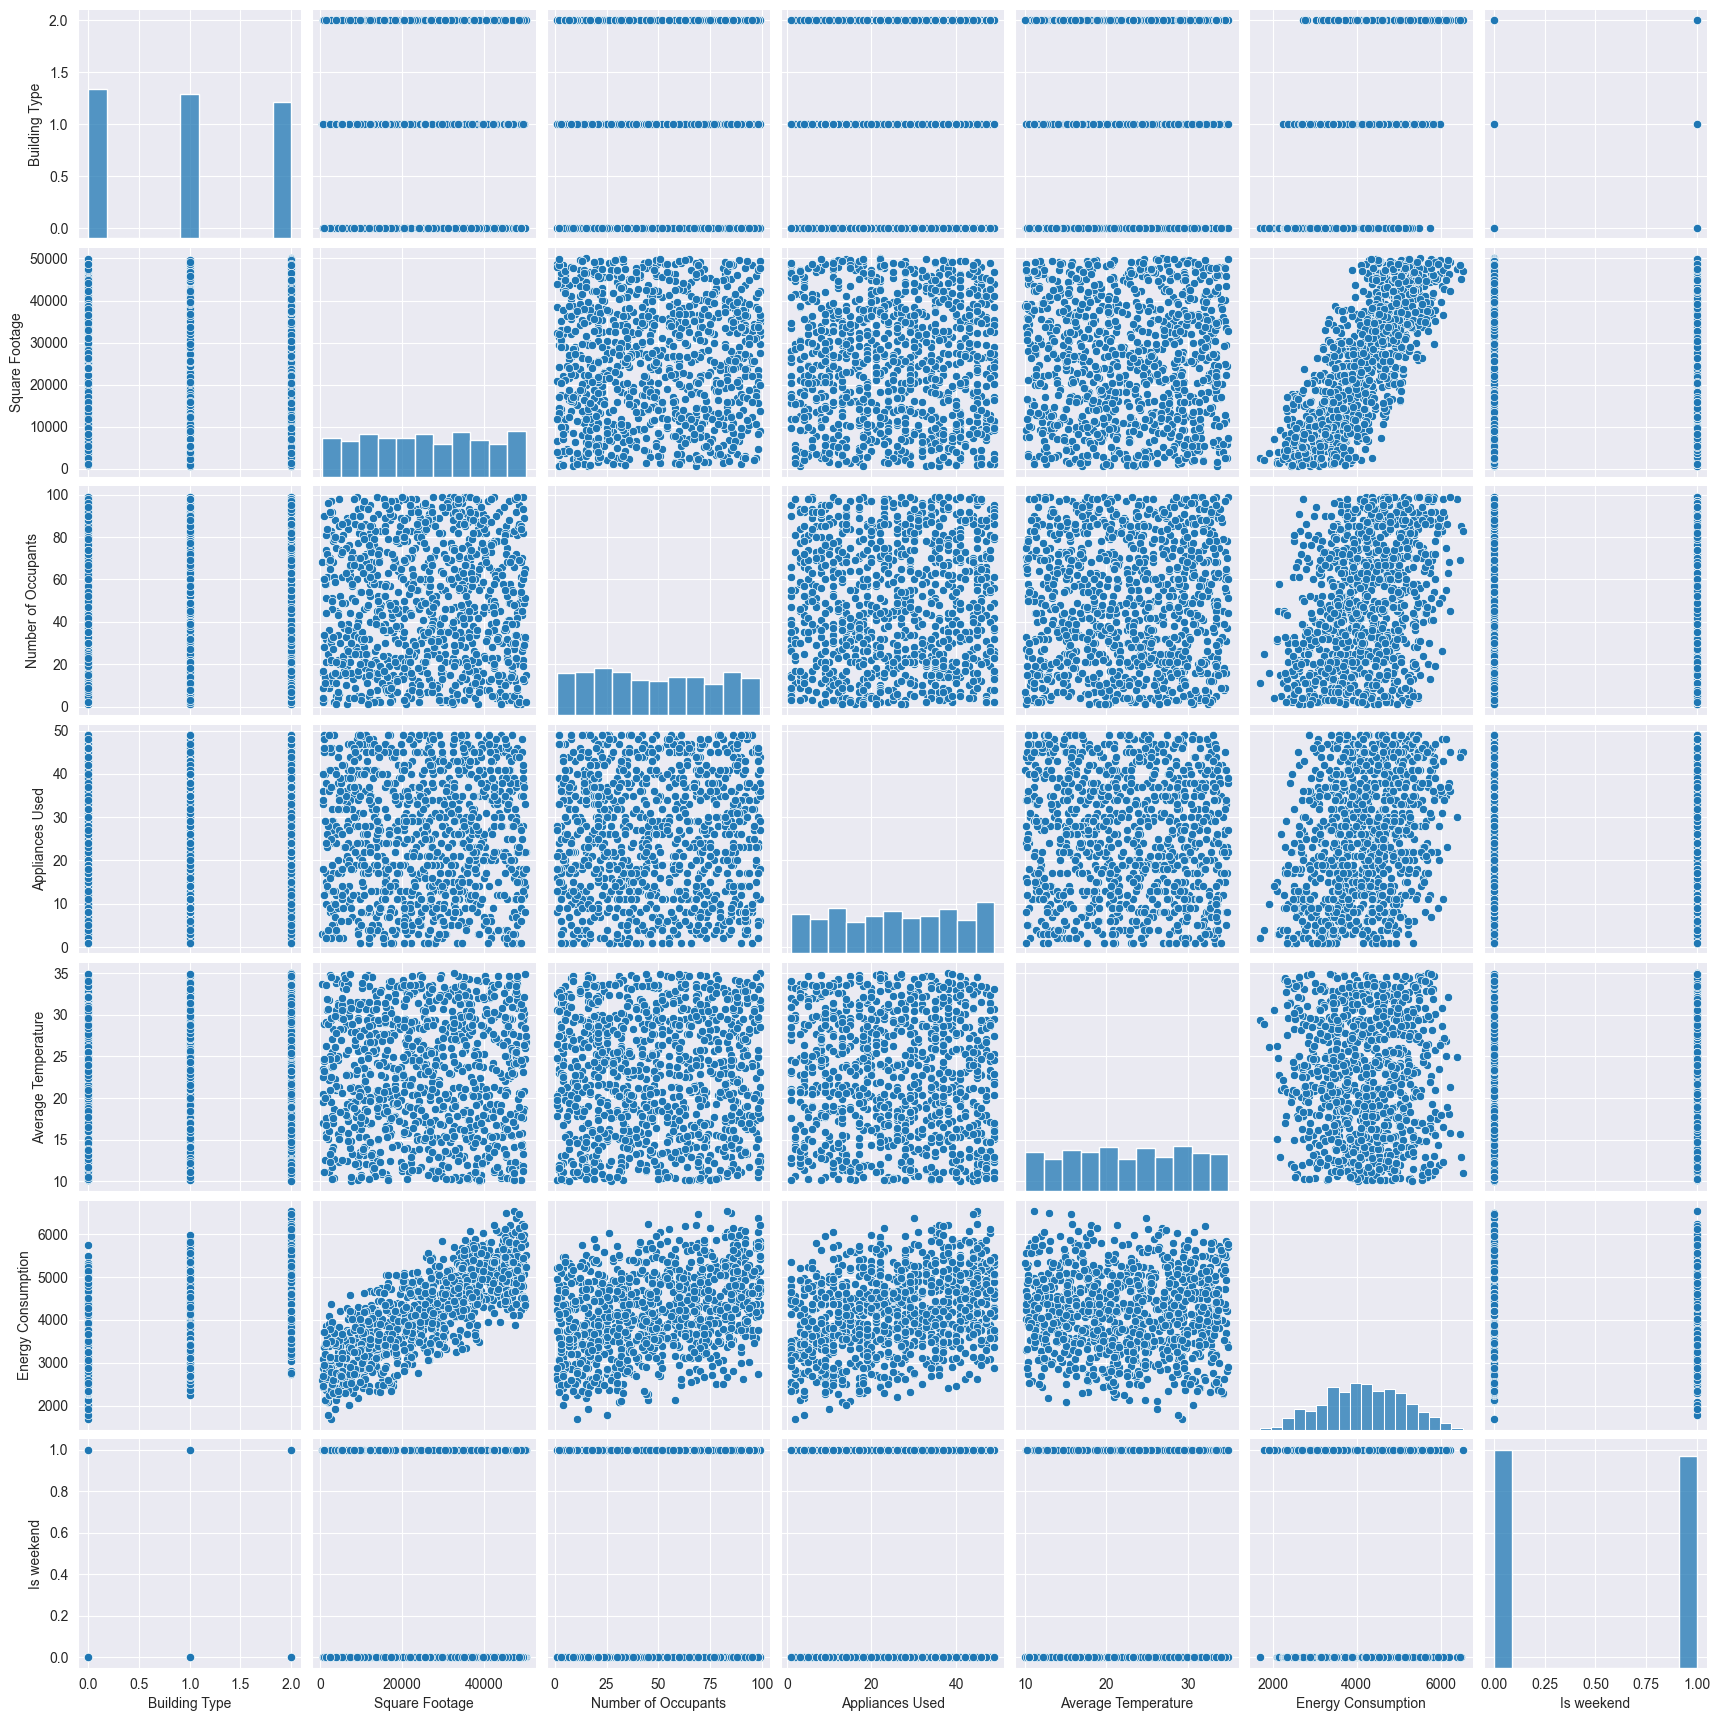

In [53]:
sns.pairplot(train_data)

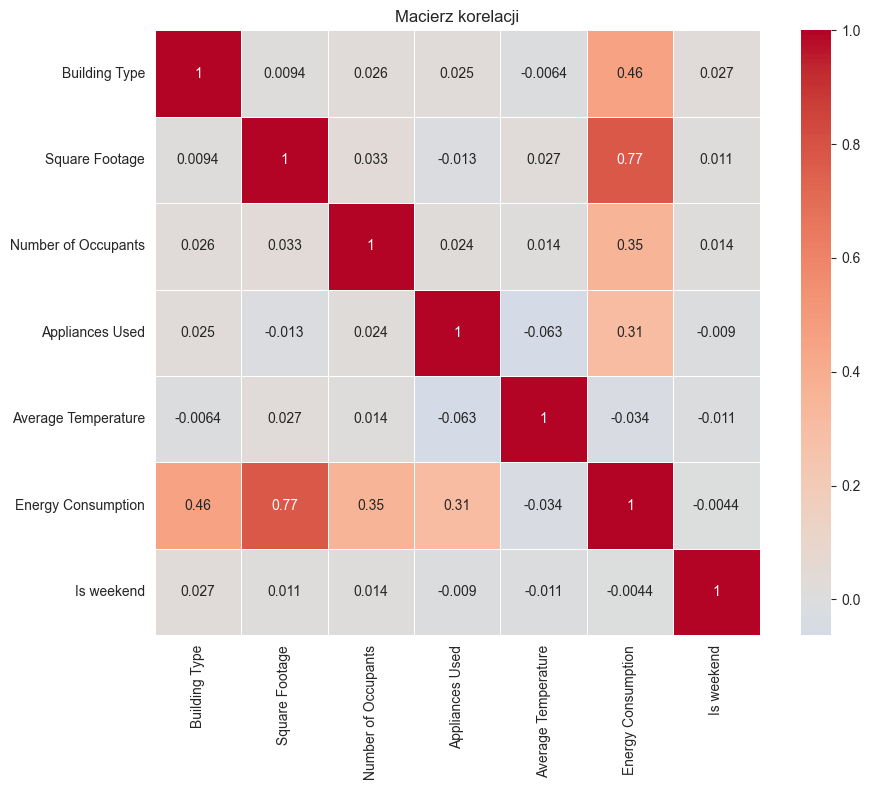

In [54]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Macierz korelacji')
plt.tight_layout()
plt.show()

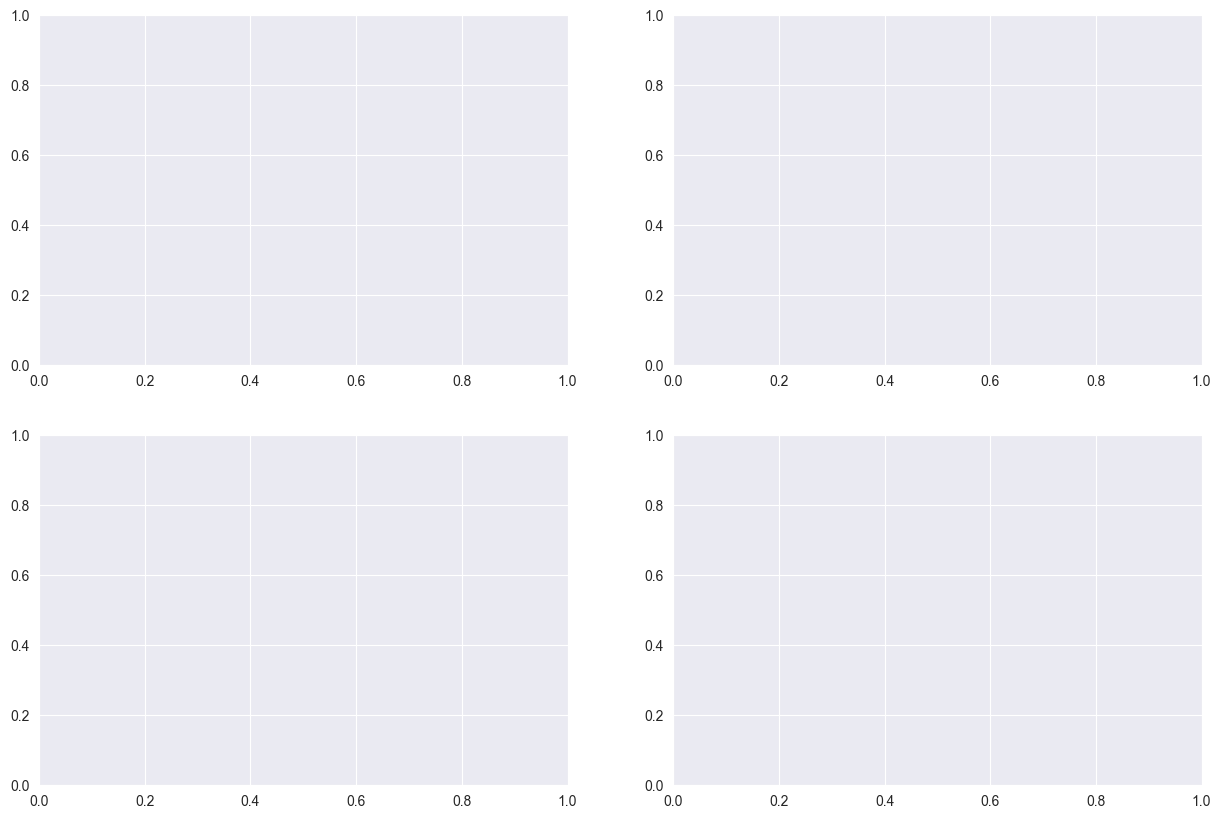

In [55]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

In [58]:
sns.boxplot(data=train_data, x='Building Type', y='Energy Consumption', ax=axes[0,0])
axes[0,0].set_title('Energy Consumption vs building type')
axes[0,0].set_xticks([0, 1, 2])
axes[0,0].set_xticklabels(['Residential', 'Commercial', 'Industrial'])


[Text(0, 0, 'Residential'), Text(1, 0, 'Commercial'), Text(2, 0, 'Industrial')]

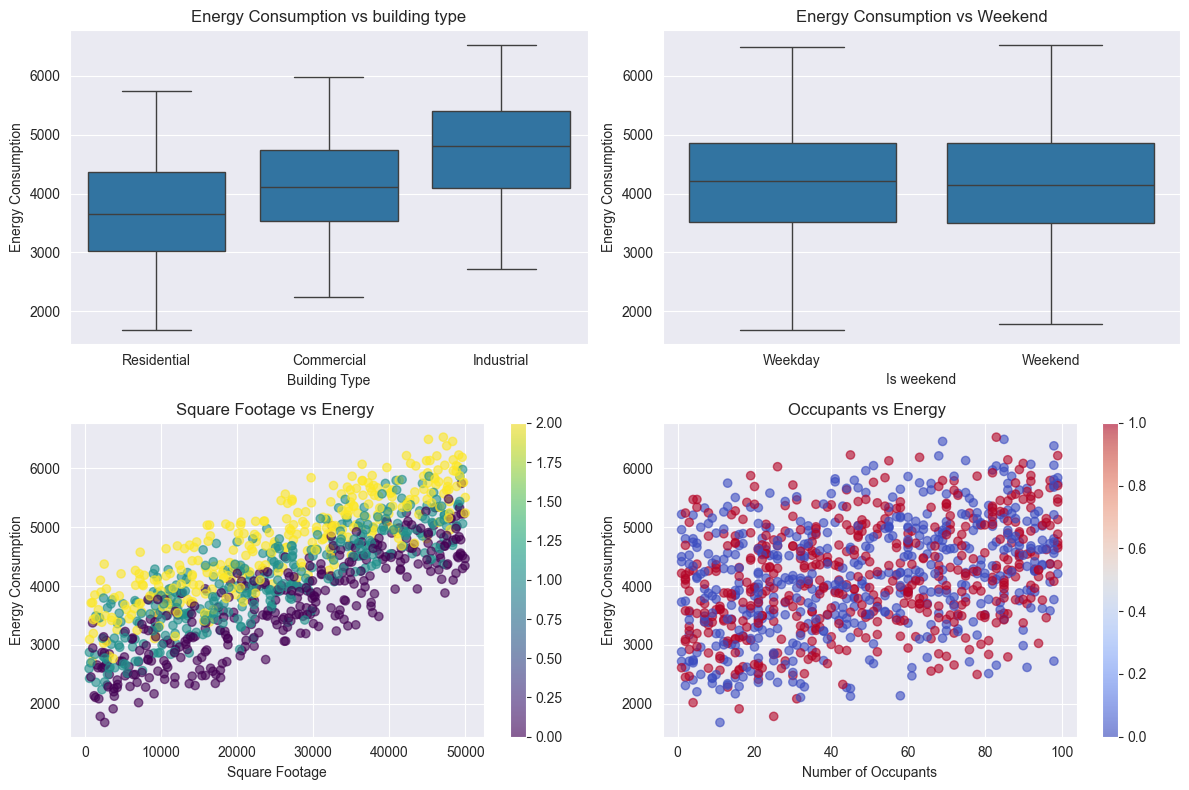

In [63]:
# Assuming you created axes and fig like this:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=train_data, x='Building Type', y='Energy Consumption', ax=axes[0,0])
axes[0,0].set_title('Energy Consumption vs building type')
axes[0,0].set_xticks([0, 1, 2])
axes[0,0].set_xticklabels(['Residential', 'Commercial', 'Industrial'])

# Boxplot for weekend
sns.boxplot(data=train_data, x='Is weekend', y='Energy Consumption', ax=axes[0,1])
axes[0,1].set_title('Energy Consumption vs Weekend')
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['Weekday', 'Weekend'])

# Scatter plot with color by Building Type
scatter = axes[1,0].scatter(train_data['Square Footage'], train_data['Energy Consumption'],
                           c=train_data['Building Type'], alpha=0.6, cmap='viridis')
axes[1,0].set_xlabel('Square Footage')
axes[1,0].set_ylabel('Energy Consumption')
axes[1,0].set_title('Square Footage vs Energy ')
fig.colorbar(scatter, ax=axes[1,0])

# Scatter plot with color by Is weekend
scatter2 = axes[1,1].scatter(train_data['Number of Occupants'], train_data['Energy Consumption'],
                            c=train_data['Is weekend'], alpha=0.6, cmap='coolwarm')
axes[1,1].set_xlabel('Number of Occupants')
axes[1,1].set_ylabel('Energy Consumption')
axes[1,1].set_title('Occupants vs Energy ')
fig.colorbar(scatter2, ax=axes[1,1])

plt.tight_layout()
plt.show()


In [60]:

scatter = axes[1,0].scatter(train_data['Square Footage'], train_data['Energy Consumption'],
                           c=train_data['Building Type'], alpha=0.6, cmap='viridis')
axes[1,0].set_xlabel('Square Footage')
axes[1,0].set_ylabel('Energy Consumption')
axes[1,0].set_title('Square Footage vs Energy (kolorowane wg typu)')
plt.colorbar(scatter, ax=axes[1,0])


C:\Users\ibuko\AppData\Local\Temp\ipykernel_24032\404271903.py:6: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1000 with 5 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, ax=axes[1,0])


<Figure size 640x480 with 0 Axes>

In [64]:
test_data = df.iloc[1000:]

In [65]:
X_train = train_data.drop('Energy Consumption', axis=1)
y_train = train_data['Energy Consumption']
X_test = test_data.drop('Energy Consumption', axis=1)
y_test = test_data['Energy Consumption']

In [69]:
models = {
    'LR': LinearRegression(),
    'RF': RandomForestRegressor(n_estimators=100,random_state=42)
}

In [71]:
results= {}

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'R²': r2,
        'MAE': mae
    }

    print(f"\n{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.2f}")



LR:
MSE: 0.00
R²: 1.0000
MAE: 0.01

RF:
MSE: 14276.00
R²: 0.9792
MAE: 94.96


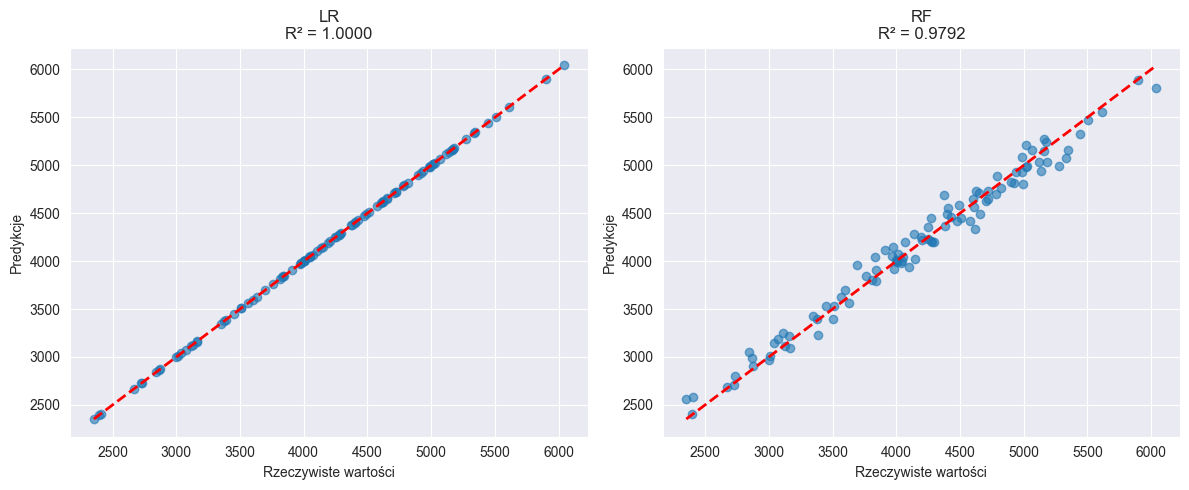

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    axes[i].scatter(y_test, y_pred, alpha=0.6)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Rzeczywiste wartości')
    axes[i].set_ylabel('Predykcje')
    axes[i].set_title(f'{name}\nR² = {results[name]["R²"]:.4f}')

plt.tight_layout()
plt.show()

